In [6]:
import os

save_path = '../data/spectrograms/SC4001E0'
os.makedirs(save_path, exist_ok=True)

In [9]:
from scipy.signal import spectrogram
from PIL import Image
import matplotlib.pyplot as plt
import io
import numpy as np

def save_spectrogram(epoch, save_file, fs=64):
    f, t, Sxx = spectrogram(epoch, fs=fs, nperseg=128, noverlap=64)

    fig = plt.figure(figsize=(1, 0.8), dpi=100)
    ax = fig.add_axes([0, 0, 1, 1]) 
    ax.axis('off')
    ax.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
    ax.set_ylim(0, 32)

    buf = io.BytesIO()
    plt.savefig(buf, format='png', dpi=100)
    buf.seek(0)

    im = Image.open(buf).convert('RGB')
    im = im.resize((76, 60))  
    im.save(save_file)
    plt.close(fig)

In [11]:
import numpy as np

data = np.load("../data/processed/SC4001E0_data.npz")
X = data['X']
y = data['y']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (154, 1920)
y shape: (154,)


In [12]:
for i in range(100):
    save_file = os.path.join(save_path, f"epoch_{i:04d}.png")
    save_spectrogram(X[i], save_file)
    print(f'file created: {save_file}')

file created: ../data/spectrograms/SC4001E0\epoch_0000.png
file created: ../data/spectrograms/SC4001E0\epoch_0001.png
file created: ../data/spectrograms/SC4001E0\epoch_0002.png
file created: ../data/spectrograms/SC4001E0\epoch_0003.png
file created: ../data/spectrograms/SC4001E0\epoch_0004.png
file created: ../data/spectrograms/SC4001E0\epoch_0005.png
file created: ../data/spectrograms/SC4001E0\epoch_0006.png
file created: ../data/spectrograms/SC4001E0\epoch_0007.png
file created: ../data/spectrograms/SC4001E0\epoch_0008.png
file created: ../data/spectrograms/SC4001E0\epoch_0009.png
file created: ../data/spectrograms/SC4001E0\epoch_0010.png
file created: ../data/spectrograms/SC4001E0\epoch_0011.png
file created: ../data/spectrograms/SC4001E0\epoch_0012.png
file created: ../data/spectrograms/SC4001E0\epoch_0013.png
file created: ../data/spectrograms/SC4001E0\epoch_0014.png
file created: ../data/spectrograms/SC4001E0\epoch_0015.png
file created: ../data/spectrograms/SC4001E0\epoch_0016.p

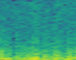

In [13]:
from IPython.display import Image as IPImage, display

display(IPImage(filename=os.path.join(save_path, 'epoch_0010.png')))